In [1]:
# %pip install -r ../requirements.txt

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/WPP2024_Demographic_Indicators_Medium.csv', low_memory=False)
location = 'Europe (48)'
df_by_location = df[df['Location'] == location]

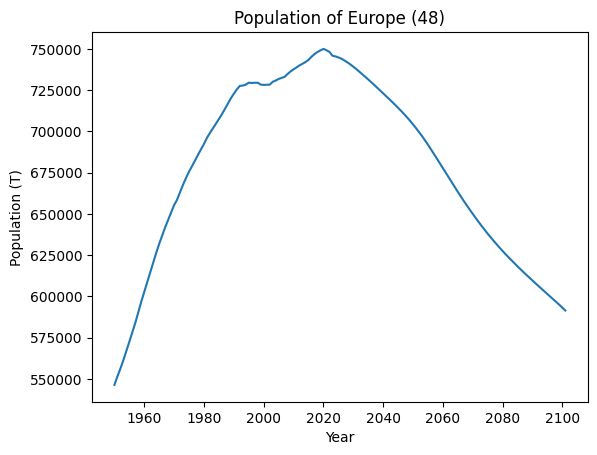

In [4]:
population = df_by_location[['Time', 'TPopulation1Jan']] 

plt.title('Population of ' + location)
plt.plot(population['Time'], population['TPopulation1Jan'])
plt.xlabel('Year')
plt.ylabel('Population (T)')
plt.show()

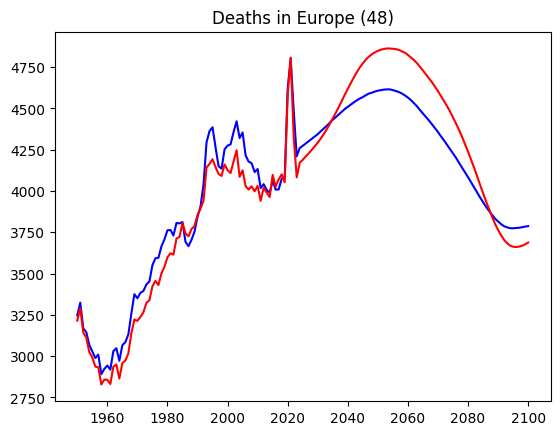

In [5]:
male_deaths = df_by_location[['Time', 'DeathsMale']]
female_deaths = df_by_location[['Time', 'DeathsFemale']]

plt.title('Deaths in ' + location)
plt.plot(male_deaths['Time'], male_deaths['DeathsMale'], color='blue')
plt.plot(female_deaths['Time'], female_deaths['DeathsFemale'], color='red')


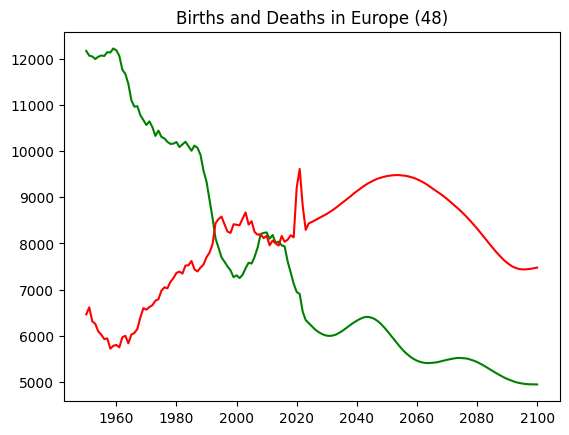

In [6]:
births = df_by_location[['Time', 'Births']]
deaths = df_by_location[['Time', 'Deaths']]

plt.title('Births and Deaths in ' + location)
plt.plot(births['Time'], births['Births'], color='green')
plt.plot(deaths['Time'], deaths['Deaths'], color='red')
plt.show()

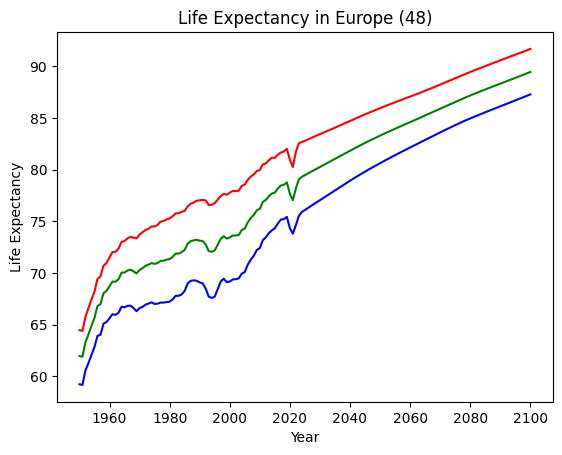

In [10]:
lex_total = df_by_location[['Time', 'LEx']]
lex_male = df_by_location[['Time', 'LExMale']]
lex_female = df_by_location[['Time', 'LExFemale']]


plt.title('Life Expectancy in ' + location)
plt.plot(lex_total['Time'], lex_total['LEx'], color='green')
plt.plot(lex_male['Time'], lex_male['LExMale'], color='blue')
plt.plot(lex_female['Time'], lex_female['LExFemale'], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()